In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
from math import sqrt

In [6]:
data = 'mxmh_survey_results.csv'
music = pd.read_csv(data)
music.drop(['Timestamp', 'Permissions', 'Foreign languages', 'Exploratory'], axis=1, inplace=True)

music.shape
music.head()


,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,156.0,Rarely,Never,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,119.0,Sometimes,Never,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,132.0,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,84.0,Sometimes,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,107.0,Never,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


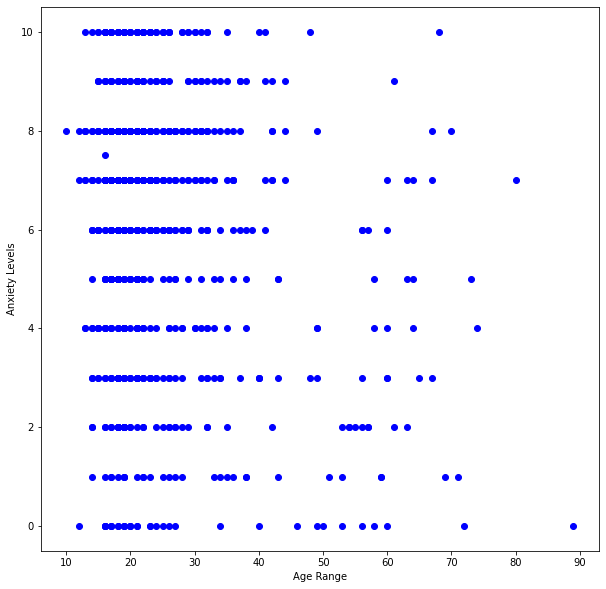

In [13]:
X = music[["Age", "Anxiety"]]

# Visualize data point
plt.figure(figsize=(10,10))
plt.scatter(X["Age"], X["Anxiety"], c="blue")
plt.xlabel("Age Range")
plt.ylabel("Anxiety Levels")
plt.show()

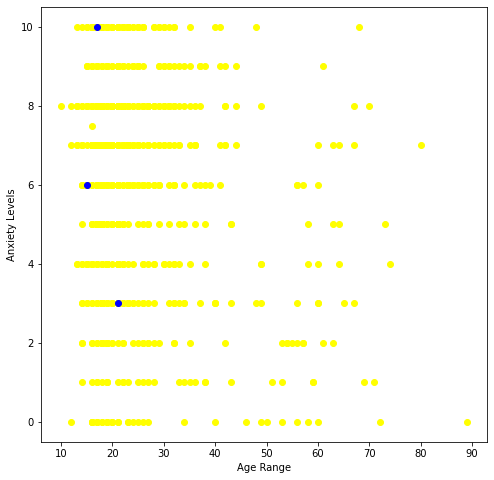

In [18]:
# No. of centroids
K = 3

# Select random observation as a centroids
Centroids = (X.sample(n = K))
plt.figure(figsize=(8,8))
plt.scatter(X["Age"], X["Anxiety"], c="yellow")
plt.scatter(Centroids["Age"], Centroids["Anxiety"], c="blue")
plt.xlabel("Age Range")
plt.ylabel("Anxiety Levels")
plt.show()


     


Text(0, 0.5, 'Age')

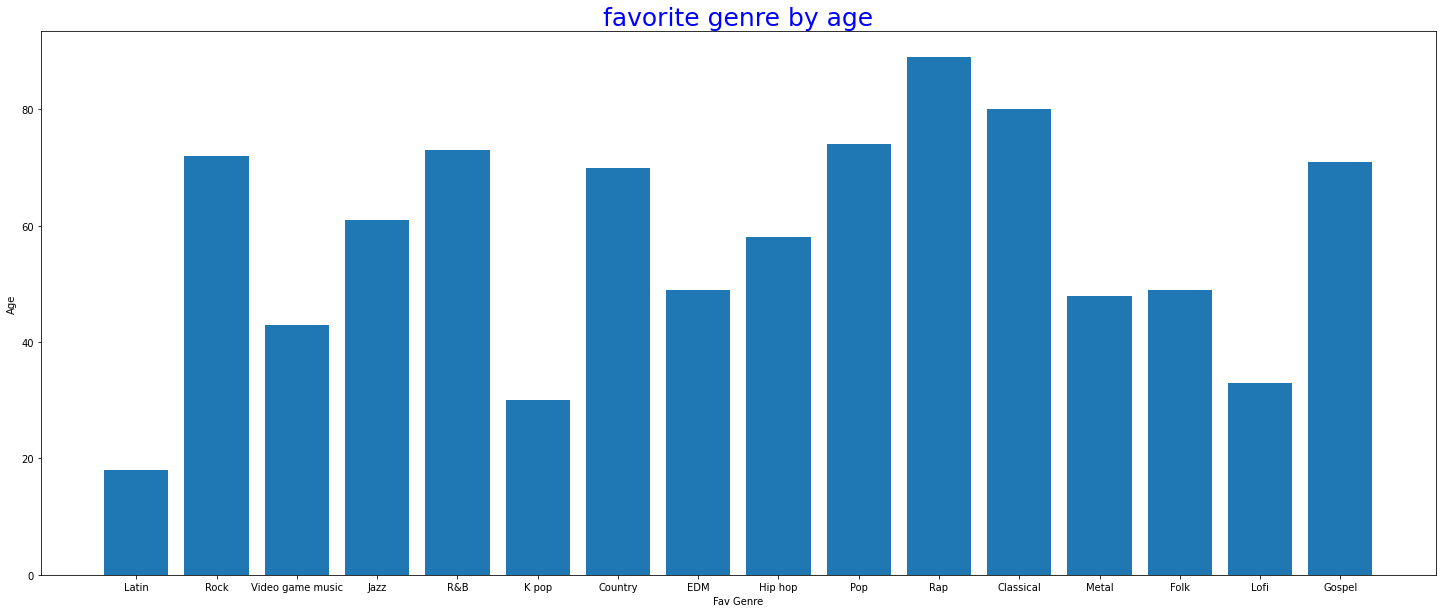

In [35]:
plt.figure(figsize=(25,10))
plt.title('favorite genre by age', fontsize = 25, color='blue')
plt.bar(music['Fav genre'], music['Age'])
plt.xlabel('Fav Genre')
plt.ylabel('Age')

In [20]:
# Still needs to be fixed / further refinement

diff = 1
j = 0

while(diff != 0):
    XD = X
    i = 1
    for index1, row_c in Centroids.iterrows():
        ED = []
        for index2, row_d in XD.iterrows():
            d1 = (row_c["Age"] - row_d["Anxiety"])**2
            d2 = (row_c["Depression"] - row_d["Depression"])**2
            d = sqrt(d1 + d2)
            ED.append(d)
        X[i] = ED
        i = i + 1
    C = []
    for index, row in X.iterrows():
        min_dist = row[1]
        pos=1
        for i in range(K):
            if row[i + 1] < min_dist:
                min_dist = row[i + 1]
                pos = i + 1
        C.append(pos)
    X["Cluster"] = C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Depression", "Anxiety"]]
    if j == 0:
        diff = 1
        j = j + 1
    else:
        diff = (Centroids_new['Depression'] - Centroids['Depression']).sum() + (Centroids_new['Anxiety'] - Centroids['Anxiety']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Depression","Anxiety"]]

KeyError: ignored